<a href="https://colab.research.google.com/github/Carlosrbrj/PUCrio/blob/main/Modelos_de_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prática - Classificação Aula 1

O objetivo dessa prática é entender como funciona os principais algoritmos de classificação na prática. Será usado o Dataset carregado a partir sklearn, iremos rodar 4 modelos distintos, classificaremos-os em relação a acurácia e, com isso, determinaremos o melhor modelo a ser usado.

In [ ]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

## 1.1 Início do projeto

O código abaixo carrega o dataset Wine e adiciona uma coluna target, que é o alvo dessa classificação. Além disso, mostra as primeiras colunas.

In [ ]:
# Carga do dataset
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names) # conversão para dataframe
dataset['target'] = wine.target # adição da coluna target

dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## 1.2 Preparação de dados

O código abaixo separa a base em atributos (x) e classe/target (y). Além disso, o processo de holdout considera a base de teste 20% do dataframe criado acima. Além disso, o método de validação escolhido foi o de Validação Cruzada, portanto, iremos dividir o dataframe em 10 folds.

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## 1.3 Modelagem

Uma vez construída a divisão da base de dados em treino e teste e considerada a validação cruzada em 10 folds, vamos rodar o modelo de classificação segundo os 4 algoritmos definidos.
Para ajudar na decisão, o código exibe em tabela os valores da média e desvio padrão dos resultados da validação cruzada que mede a acurácia do modelo e o gráfico boxplot os comparam.

KNN: 0.675238 (0.087929)
CART: 0.880476 (0.055183)
NB: 0.971429 (0.047380)
SVM: 0.683333 (0.078282)


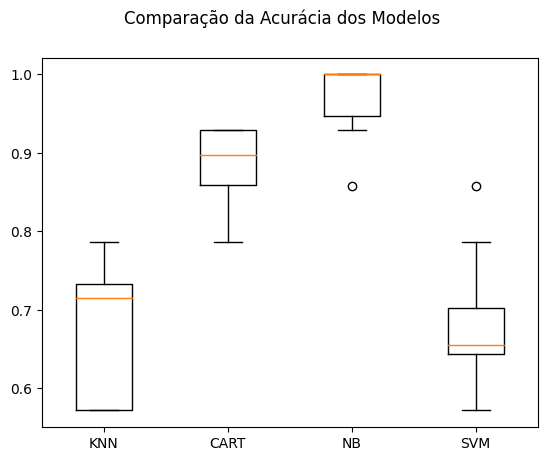

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base na figura acima, entendemos que o algoritmo que gerou melhor resultado com acurácia média de 97% foi o Naive Bayess. Sendo assim, o código abaixo usa todo o conjunto de treino para estimar os valores de y com base no algoritmo NB. Por fim, também calculamos a acurácia do modelo.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

1.0


# 2. Aplicação Teste

O modelo descrito acima será aplicado para o Dataset breast cancer da sckit-learn.

In [ ]:
# Importando o Dataset
from sklearn.datasets import load_breast_cancer
# Carga do dataset
breast_cancer = load_breast_cancer()
dataset = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names) # conversão para dataframe
dataset['target'] = breast_cancer.target # adição da coluna target

dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2.1 Preparação de dados
O código abaixo prepara os dados como fizemos anteriormente.

In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:30] # atributos
y = array[:,30] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

## 2.2 Modelo

Com tudo pronto, vamos rodar o modelo com os 4 algoritmos e usaremos a validação cruzada como decisor de escolha para o melhor modelo. Para isso, o resultado do 10-fold é a média da acurácia de cada modelo e o gráfico boxplot vai sumarizar esses resultados, facilitandoa visualização desses.

KNN: 0.936232 (0.045443)
CART: 0.916184 (0.043158)
NB: 0.933720 (0.041136)
SVM: 0.907295 (0.057778)


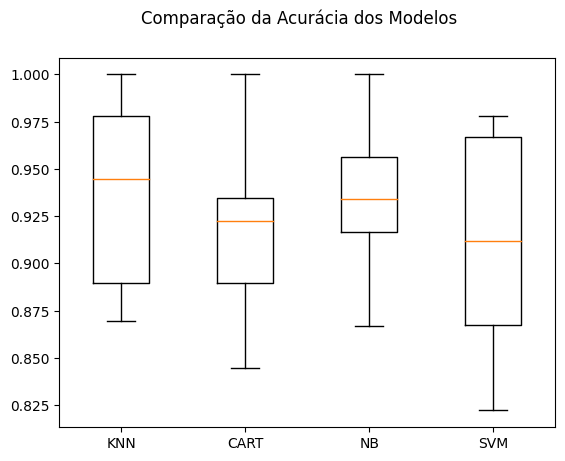

In [ ]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base nisso, o melhor modelo classificador com base na acurácia média dos resultados é o KNN para os 10 vizinhos mais próximos. Com isso, o código abaixo usa toda a base de treino para treinar o modelo com esse algortimo, além de imprimir a acurácia.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9385964912280702
